In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/RESUME_PROJECTS/NLP_ML/train.txt",sep = ';',header = None,names = ['text','emotion'])

In [3]:
df.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [4]:
df.head()

,text,emotion
0,i didnt feel humiliated,sadness
1,i can go from feeling so hopeless to so damned...,sadness
2,im grabbing a minute to post i feel greedy wrong,anger
3,i am ever feeling nostalgic about the fireplac...,love
4,i am feeling grouchy,anger


In [5]:
df.isnull().sum()

,0
text,0
emotion,0


In [6]:
df['emotion'].nunique()

6

##  Label Encoding the Target Variable

In [7]:

unique_emotions = df['emotion'].unique()
emotion_numbers = {}
x=0
for i in unique_emotions:
  emotion_numbers[i] = x
  x+=1

df['emotion'] = df['emotion'].map(emotion_numbers) # to replace the emotion strings with their assigned integers

In [8]:
emotion_numbers

{'sadness': 0, 'anger': 1, 'love': 2, 'surprise': 3, 'fear': 4, 'joy': 5}

In [9]:
df

,text,emotion
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,1
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,1
...,...,...
15995,i just had a very brief time in the beanbag an...,0
15996,i am now turning and i feel pathetic that i am...,0
15997,i feel strong and good overall,5
15998,i feel like this was such a rude comment and i...,1


## Text Preprocessing

In [10]:
df['text'] = df['text'].apply(lambda x : x.lower())

### Defining a Function for Punctuation Removal

In [11]:
import string
"""
  This function takes a text string and removes all punctuation
  using the efficient string.translate() method.
  """
def remove_punc(txt):
  return txt.translate(str.maketrans('','',string.punctuation))

In [12]:
df['text'] = df['text'].apply(remove_punc)

### Removing Numbers from Text

In [13]:
def remove_numbers(txt):
    new = ""
    for i in txt:
        if not i.isdigit():
            new = new + i    # Goes through the string and keeps only non-numbers

    return new

df['text'] = df['text'].apply(remove_numbers)

### Removing Emojis and Non-ASCII Characters

In [14]:
def remove_emojis(txt):
    new = ""
    for i in txt:
        if i.isascii():
            new += i
    return new

df['text'] = df['text'].apply(remove_emojis)

### Importing NLTK for Advanced Text Processing

In [15]:
import nltk

In [16]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [17]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Creating a Set of Stop Words for Efficiency

In [18]:
stop_words = set(stopwords.words('english'))

In [19]:
df.loc[1]['text']

'i can go from feeling so hopeless to so damned hopeful just from being around someone who cares and is awake'

### Defining the Stop Word Removal Function

In [20]:
def remove(txt):
  """
  This function performs three actions:
  1. Tokenizes the input text into words.
  2. Removes any words that are in the global 'stop_words' set.
  3. Joins the remaining words back into a single string.
  """
  words = word_tokenize(txt)
  cleaned = [w for w in words if w.lower() not in stop_words]
  return ' '.join(cleaned)

In [21]:

import nltk

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

### Applying the Stop Word Removal Function

In [22]:
df['text'] = df['text'].apply(remove)

In [23]:
df.loc[1]['text']

'go feeling hopeless damned hopeful around someone cares awake'

In [24]:
df.head()

,text,emotion
0,didnt feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,im grabbing minute post feel greedy wrong,1
3,ever feeling nostalgic fireplace know still pr...,2
4,feeling grouchy,1


## Preparing Data for Modeling

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['emotion'], test_size=0.20, random_state=42)

## Model 1: Naive Bayes with Bag-of-Words

In [26]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

bow_vectorizer = CountVectorizer()
X_train_bow = bow_vectorizer.fit_transform(X_train)
X_test_bow = bow_vectorizer.transform(X_test)


nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)


pred_bow = nb_model.predict(X_test_bow)
print(accuracy_score(y_test, pred_bow))

0.7678125


In [27]:
pred_bow

array([0, 5, 0, ..., 5, 5, 0])

## Model 2: Naive Bayes with TF-IDF

In [28]:
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)


nb2_model = MultinomialNB()
nb2_model.fit(X_train_tfidf,y_train)

y_pred = nb2_model.predict(X_test_tfidf)
print(accuracy_score(y_test, y_pred))

0.6609375


## Model 3: Logistic Regression with TF-IDF

In [29]:
from sklearn.linear_model import LogisticRegression
logistic_model = LogisticRegression(max_iter=1000)

logistic_model.fit(X_train_tfidf,y_train)
log_pred = logistic_model.predict(X_test_tfidf)

log_pred = logistic_model.predict(X_test_tfidf)

print(accuracy_score(y_test,log_pred ))

0.8615625


## Model 4: Support Vector Machine (SVM) with TF-IDF

In [30]:

from sklearn.svm import LinearSVC

svm_model = LinearSVC(random_state=42)
svm_model.fit(X_train_tfidf, y_train)
svm_pred = svm_model.predict(X_test_tfidf)

print(f"Model Accuracy (SVM with TF-IDF): {accuracy_score(y_test, svm_pred)}")

Model Accuracy (SVM with TF-IDF): 0.891875


In [31]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# A pipeline that chains the vectorizer and the SVM model
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('clf', LinearSVC(random_state=42))
])


parameters = {
    'tfidf__ngram_range': [(1, 1), (1, 2)],  # Try single words and word pairs
    'clf__C': [0.1, 1, 10]                   # Try different penalty strengths
}


grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)


print("\nBest parameters set found on development set:")
print(grid_search.best_params_)

best_model_pred = grid_search.predict(X_test)
print(f"\nAccuracy of the Best Tuned Model on Test Set: {accuracy_score(y_test, best_model_pred)}")

Fitting 5 folds for each of 6 candidates, totalling 30 fits

Best parameters set found on development set:
{'clf__C': 10, 'tfidf__ngram_range': (1, 2)}

Accuracy of the Best Tuned Model on Test Set: 0.9015625


In [32]:
import pickle


with open('emotion_classifier.pkl', 'wb') as f:
    pickle.dump(grid_search, f)

Classification Report:
              precision    recall  f1-score   support

     sadness       0.94      0.94      0.94       946
       anger       0.89      0.89      0.89       427
        love       0.84      0.80      0.82       296
    surprise       0.83      0.75      0.79       113
        fear       0.87      0.84      0.85       397
         joy       0.91      0.94      0.93      1021

    accuracy                           0.90      3200
   macro avg       0.88      0.86      0.87      3200
weighted avg       0.90      0.90      0.90      3200



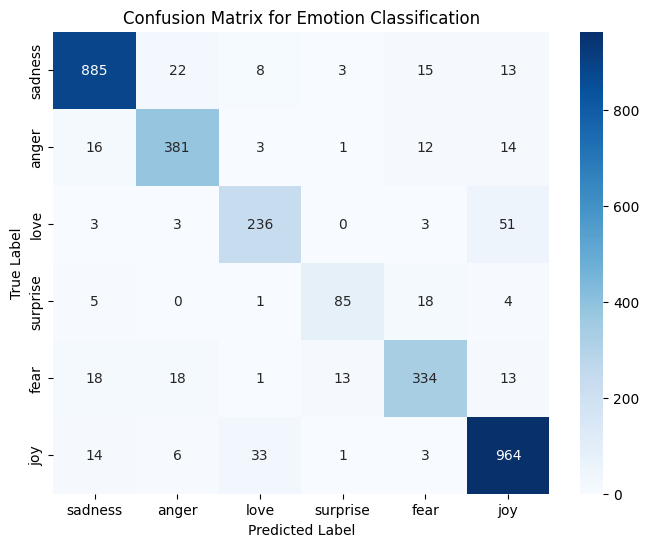

In [34]:

from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# --- Define the Emotion Map ---

emotion_map = {
    0: 'sadness',
    1: 'anger',
    2: 'love',
    3: 'surprise',
    4: 'fear',
    5: 'joy'
}

# Best model (grid_search) to make predictions on the test set
y_pred = grid_search.predict(X_test)

# --- Generate and Print the Classification Report ---
print("Classification Report:")
# The 'target_names' parameter uses our map to show the emotion names
print(classification_report(y_test, y_pred, target_names=emotion_map.values()))

# --- Generate and Plot the Confusion Matrix ---
cm = confusion_matrix(y_test, y_pred)

# Create a plot
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,        # Show the numbers in the cells
    fmt='d',           # Format the numbers as integers
    cmap='Blues',
    xticklabels=emotion_map.values(),
    yticklabels=emotion_map.values()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Emotion Classification')
plt.show()

## Model Performance and Insights

After a systematic process of data cleaning, feature engineering, and hyperparameter tuning, the final Support Vector Machine (SVM) model achieved a high level of performance, with a **weighted average F1-score of 0.90**. This indicates that the model is robust and effective at classifying emotions from text.

However, a deeper analysis using a classification report and a confusion matrix reveals a more nuanced story about the model's strengths, weaknesses, and the inherent challenges of this NLP task.

---

### Key Strengths 💪

The model demonstrates exceptional performance on the emotions with the most data: **'joy'** and **'sadness'**.

- **Joy:** With an **F1-score of 0.93** and high precision (0.91), the model is very reliable when it predicts 'joy'. The confusion matrix shows it correctly identified **964 out of 1021** 'joy' texts.
- **Sadness:** Similarly, 'sadness' has an outstanding **F1-score of 0.94**. When the model predicts 'sadness', it is correct 94% of the time.

**Insight:** The model's success here is directly linked to the high volume of training data for these classes. This allowed it to learn a rich and diverse vocabulary associated with these two very distinct emotions.

---

### Areas for Improvement and Key Insights 🧐

The analysis also highlights where the model struggles, providing valuable insights into the nature of language and emotion.

- **The 'Love' vs. 'Joy' Confusion:** The most significant area of error is the model's tendency to misclassify **'love' as 'joy' (51 instances)**. This is not necessarily a model failure but rather a reflection of a linguistic reality: the language used to express love and joy is often identical (e.g., "I'm so happy you're in my life," "This is the best day ever"). The model struggles to find the subtle features that differentiate these two positive emotions.
- **The 'Anger' vs. 'Sadness' Overlap:** The model sometimes confuses 'anger' and 'sadness'. This is another logical confusion, as texts describing frustrating situations can contain vocabulary common to both emotions (e.g., words related to disappointment, hurt, or negative events).
- **Difficulty with 'Surprise':** The model had its lowest recall score on **'surprise' (0.75)**, meaning it missed 25% of all 'surprise' texts. The confusion matrix shows these were most often misclassified as **'fear' (19 instances)**. This insight suggests that the textual cues for surprise can be ambiguous and might overlap with the initial shock or alarm associated with fear.

---

### Final Conclusion

The model is highly effective and production-ready for identifying the core emotions of **joy and sadness**. Its performance on other emotions is good but reveals predictable challenges in distinguishing between semantically similar feelings like love and joy.

The key takeaway is that the model's errors are not random; they are logical and provide a clear path for future improvements. To further enhance performance, one might need to incorporate more contextual features or use more advanced models (like Transformers) that can better understand the subtle nuances that differentiate these closely related emotions.
